In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (10, 8)


## Всего случаев

In [2]:

total = pd.read_csv('data_total.csv', sep=';', parse_dates=['Дата'], index_col='Дата')
total.columns = total.columns.str.strip()
total

,СПб,Лен. обл.,Москва
Дата,,,
2020-03-05,1,0,0
2020-03-06,1,0,5
2020-03-07,2,0,5
2020-03-08,2,0,5
2020-03-09,2,0,6
2020-03-10,2,0,6
2020-03-11,2,0,6
2020-03-12,2,0,10
2020-03-13,5,1,15


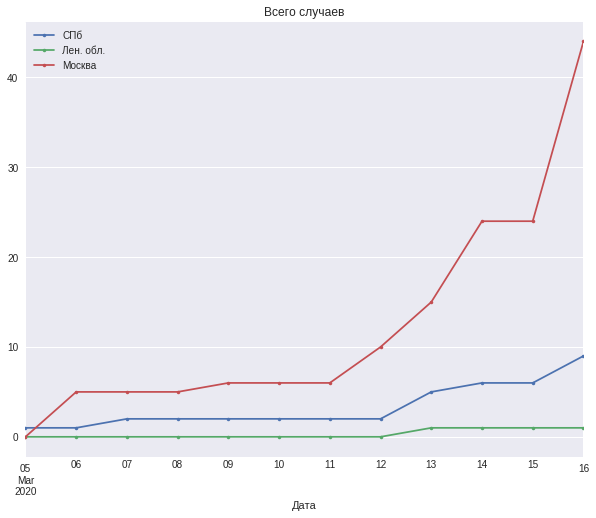

In [3]:
total.plot(style='.-', title = "Всего случаев")

In [4]:
total.keys()

Index(['СПб', 'Лен. обл.', 'Москва'], dtype='object')

            СПб  СПб x2, дней
Дата                         
2020-03-05    1           NaN
2020-03-06    1           NaN
2020-03-07    2           NaN
2020-03-08    2           NaN
2020-03-09    2           NaN
2020-03-10    2           NaN
2020-03-11    2           NaN
2020-03-12    2           NaN
2020-03-13    5           1.0
2020-03-14    6           2.0
2020-03-15    6           3.0
2020-03-16    9           4.0


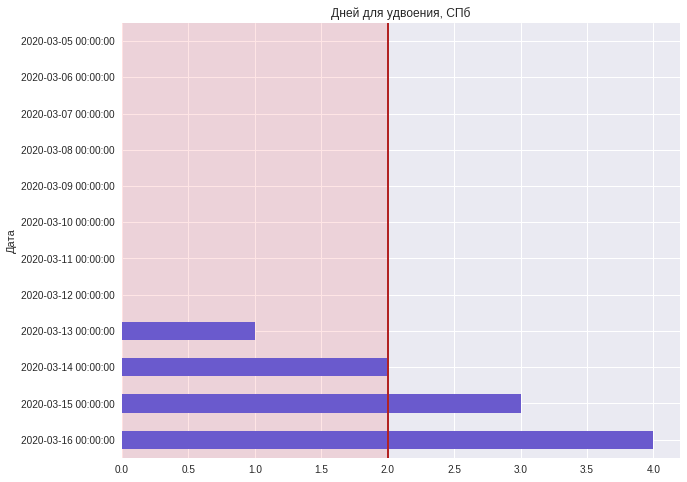

In [5]:
#Число дней, понадобившихся для удвоения


rate = [] #дней для удвоения
city = 'СПб'

#для каждой даты
for cur_row in range(0, total[city].size, 1):
    half = int(total[city].values[cur_row] / 2)    
    if (half < 2): #при малом числе случаев, как-то бессмысленно оценивать скорость
        rate.append(None)
        continue        
    
    #назад по списку, пока не найдём значение в два раза меньшее, чем на текущую дату
    for prev in range(cur_row - 1, -1, -1):        
        #print(prev, half, total['СПб'].values[row])               
        if half >= total[city].values[prev]:
            diff = total[city].index[cur_row] - total[city].index[prev]
            rate.append(diff.days)
            break
    


spb = total[[city]].copy()
spb[city + ' x2, дней'] = rate
print(spb)

plt.axvline(x=2, lw=2, color='firebrick')
x = np.array([0, 1, 2])
plt.fill_between(x, -1, total[city].size + 1,  color='red', alpha=0.1)
spb[city + ' x2, дней'].plot.barh(color = 'slateblue', title = "Дней для удвоения, " + city) 
plt.gca().invert_yaxis()

## Новых случаев

In [6]:
new_case = pd.read_csv('data_new.csv', sep=';', parse_dates=['Дата'], index_col='Дата')
new_case.columns = new_case.columns.str.strip()

In [7]:
new_case

,СПб,Лен. обл.,Москва,Моск. обл
Дата,,,,
2020-03-02,0,0,1,1
2020-03-03,0,0,0,0
2020-03-04,0,0,0,0
2020-03-05,1,0,0,0
2020-03-06,0,0,5,0
2020-03-07,1,0,0,0
2020-03-08,0,0,0,1
2020-03-09,0,0,3,0
2020-03-10,0,0,0,0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f157b876d68>,
      dtype=object)

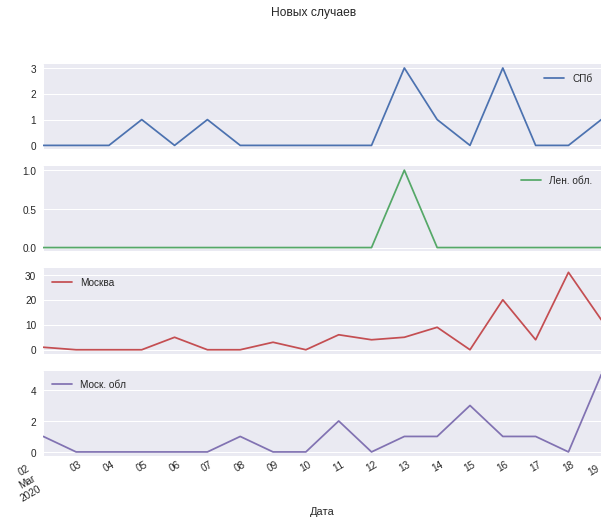

In [8]:
new_case.plot(subplots = True, title = "Новых случаев")

            Москва  Москва gf
Дата                         
2020-03-02       1        NaN
2020-03-03       0   0.000000
2020-03-04       0        NaN
2020-03-05       0        NaN
2020-03-06       5        NaN
2020-03-07       0   0.000000
2020-03-08       0        NaN
2020-03-09       3        NaN
2020-03-10       0   0.000000
2020-03-11       6        NaN
2020-03-12       4   0.666667
2020-03-13       5   1.250000
2020-03-14       9   1.800000
2020-03-15       0   0.000000
2020-03-16      20        NaN
2020-03-17       4   0.200000
2020-03-18      31   7.750000
2020-03-19      12   0.387097


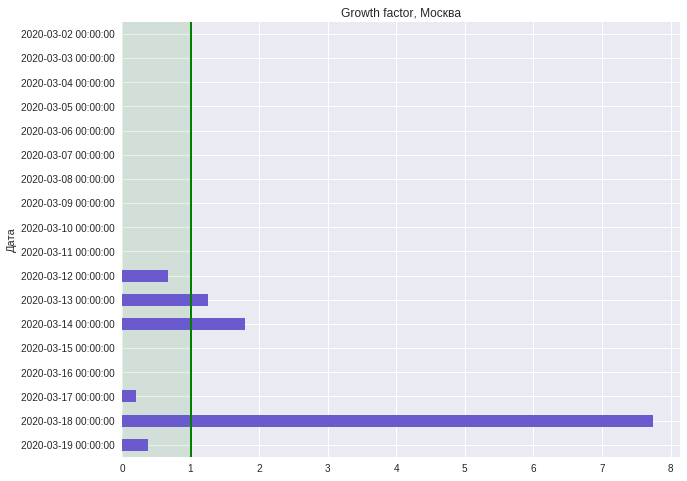

In [9]:
#Growth factor
gf = [] #дней для удвоения
city = 'Москва'

gf.append(None) # для первой даты
#для каждой даты
for row in range(1, new_case[city].size, 1):
    if (0 == new_case[city].values[row - 1]):
        gf.append(None)
    else:
        gf.append(new_case[city].values[row] / new_case[city].values[row - 1])
    #print(new_case[city].values[row], new_case[city].values[row - 1], gf)


city_gf = new_case[[city]].copy()
city_gf[city + ' gf'] = gf
print(city_gf)

plt.axvline(x=1, lw=2, color='green')
x = np.array([0, 1])
plt.fill_between(x, -1, new_case[city].size + 1, color='green', alpha=0.1)
city_gf[city + ' gf'].plot.barh(color = 'slateblue', title = "Growth factor, " + city) 
plt.gca().invert_yaxis()